## Step 3 - Climate Analysis and Exploration

In [13]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime

In [14]:
#Create engine using the 'hawaii.sqlite' database file
engine = create_engine("sqlite:///hawaii.sqlite")

In [15]:
# Declare a Base using 'automap_base()'
Base = automap_base()

In [16]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [17]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [18]:
# Assign the station class to a variable called 'Station'
Station=Base.classes.station

In [19]:
# Assign the measurement class to a variable called 'Measurement'
Measurement=Base.classes.measurement

In [20]:
#Create a session
session=Session(engine)

### Precipitation Analysis

<ul>
    <li>Design a query to retrieve the last 12 months of precipitation data.</li>
    <li>Select only the date and prcp values.</li>
    <li>Load the query results into a Pandas DataFrame and set the index to the date column.</li>
    <li>Plot the results using the DataFrame plot method.</li>
    <li>Use Pandas to print the summary statistics for the precipitation data.</li>
</ul>

In [22]:
#calculate the latest date of observation in our db
ldate=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
l=ldate[0]
print(l)

2017-08-23


In [23]:
#convert the query result to the datetime object
latest_date=pd.to_datetime(l).date()
print(latest_date)

2017-08-23


In [24]:
#Calculate a time delta (365 days from the latest_date):
query_date =latest_date-dt.timedelta(days=365)
print(query_date)

2016-08-23


In [25]:
#query date and prcp values for the last 12 months
date_prcp=(session.query(Measurement.date,Measurement.prcp)
.filter(Measurement.date>=query_date)
.order_by(Measurement.date.desc()).all())
date_prcp

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', 0.0),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017-08-1

In [26]:
#Load the query results into a Pandas DataFrame
df_prcp=pd.DataFrame(date_prcp, columns=['date','precipitation'])
#set the index to the date column
df_prcp.set_index('date', inplace=True)
df_prcp.head(10)

,precipitation
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
2017-08-22,0.00
2017-08-22,0.50
2017-08-21,0.00
2017-08-21,0.02


In [27]:
#convert 'date' from str to datetime object
df_prcp.index = pd.to_datetime(df_prcp.index)


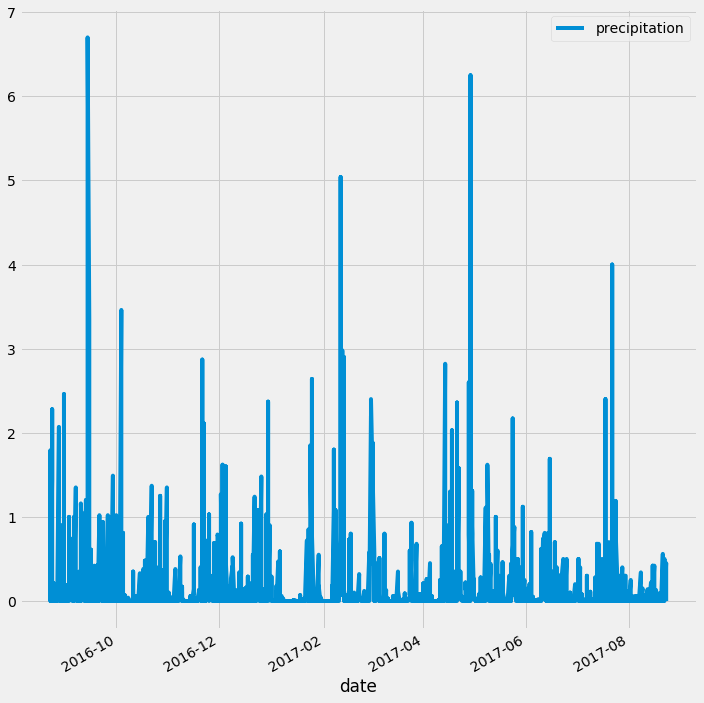

In [28]:
#Plot the results using the DataFrame plot method
#Using the x_compat parameter, it is possible to suppress automatic tick resolution adjustment
#http://pandas.pydata.org/pandas-docs/stable/visualization.html#suppressing-tick-resolution-adjustment
df_prcp.plot(figsize=(10,10), x_compat=True)
plt.tight_layout()
plt.savefig("precipitation.png", dpi=100, bbox_inches='tight')
plt.show()

In [29]:
#Use Pandas to print the summary statistics for the precipitation data
df_prcp.describe()

,precipitation
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


### Station Analysis

<ul>
    <li>Design a query to calculate the total number of stations.</li>

<li>Design a query to find the most active stations.
   <ul>

        <li>List the stations and observation counts in descending order</li>
        <li>Which station has the highest number of observations?</li>
   </ul>

</li>

<li>Design a query to retrieve the last 12 months of temperature observation data (tobs).
    <ul>

<li>Filter by the station with the highest number of observations.</li>
<li>Plot the results as a histogram with bins=12.</li>
    </ul>

</li>



In [30]:
#calculate the total number of stations:
session.query(func.count(Station.station)).all()

[(9)]

In [31]:
# find the most active stations, list the stations and observation counts in descending order
(session.query(Measurement.station, Station.name, func.count(Measurement.station))
 .filter(Measurement.station==Station.station)
 .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all())

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

'USC00519281' station has the highest number of observations: 2772

In [32]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs)
#Filter by the station with the highest number of observations: 'USC00519281'
#In previous module (Precipitation Analysis) we calculated query_date=latest_date-dt.timedelta(days=365)=2016-08-23
tobs_data=(session.query(Measurement.tobs).filter(Measurement.station=='USC00519281')
           .filter(Measurement.date>=query_date).all())
print(tobs_data)

[(77,), (77,), (80,), (80,), (75,), (73,), (78,), (77,), (78,), (80,), (80,), (78,), (78,), (78,), (73,), (74,), (80,), (79,), (77,), (80,), (76,), (79,), (75,), (79,), (78,), (79,), (78,), (78,), (76,), (74,), (77,), (78,), (79,), (79,), (77,), (80,), (78,), (78,), (78,), (77,), (79,), (79,), (79,), (79,), (75,), (76,), (73,), (72,), (71,), (77,), (79,), (78,), (79,), (77,), (79,), (77,), (78,), (78,), (78,), (78,), (77,), (74,), (75,), (76,), (73,), (76,), (74,), (77,), (76,), (76,), (74,), (75,), (75,), (75,), (75,), (71,), (63,), (70,), (68,), (67,), (77,), (74,), (77,), (76,), (76,), (75,), (76,), (75,), (73,), (75,), (73,), (75,), (74,), (75,), (74,), (75,), (73,), (75,), (73,), (73,), (74,), (70,), (72,), (70,), (67,), (67,), (69,), (70,), (68,), (69,), (69,), (66,), (65,), (68,), (62,), (75,), (70,), (69,), (76,), (76,), (74,), (73,), (71,), (74,), (74,), (72,), (71,), (72,), (74,), (69,), (67,), (72,), (70,), (64,), (63,), (63,), (62,), (70,), (70,), (62,), (62,), (63,), (65,)

In [33]:
#Load the query results into a Pandas DataFrame:
tobs_df=pd.DataFrame(tobs_data, columns=['tobs'])
tobs_df.head()

,tobs
0,77
1,77
2,80
3,80
4,75


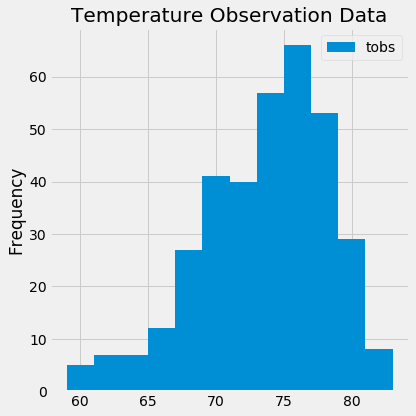

In [34]:
#Plot the results as a histogram with bins=12.
tobs_df.plot(kind='hist',bins=12, figsize=(6,6))
plt.title("Temperature Observation Data")
plt.tight_layout()
plt.savefig("tobs.png", dpi=100, bbox_inches='tight')
plt.show()

### Temperature Analysis

<ul>
    <li>Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.</li>
    <li>Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")</li>

    <li>Plot the min, avg, and max temperature from your previous query as a bar chart.
           <ul>

           <li>Use the average temperature as the bar height.</li>
           <li>Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).</li>
           </ul>
    </li>
</ul>




In [35]:
#function accepts a start date and end date in the format %Y-%m-%d 
#function returns the minimum, average, and maximum temperatures for that range of dates from Measurement table
def calc_temps(start_date, end_date):
    temp=(session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs))
              .filter(Measurement.date>=start_date)
              .filter(Measurement.date<=end_date).all())
   
    return temp

In [36]:
#calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year

res_temp=calc_temps('2017-05-05', '2017-05-18')
print(res_temp)
type(res_temp)

[(66, 75.0253164556962, 80)]


list

In [37]:
#Plot the min, avg, and max temperature from your previous query as a bar chart.
#Use the average temperature as the bar height.
#Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).
x=1
y=round(res_temp[0][1],2)
yerr=res_temp[0][2]-res_temp[0][0]

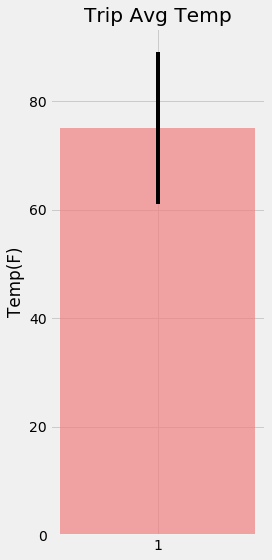

In [38]:
#create a bar chart
fig = plt.figure(figsize=(4, 8))
plt.bar(x, y, yerr=yerr, align='center', color='lightcoral', alpha=0.7, tick_label=1)
plt.title("Trip Avg Temp")
plt.ylabel("Temp(F)")
plt.tight_layout()
plt.savefig("bar.png", dpi=100)
plt.show()

### Optional Recommended Analysis

Calculate the rainfall per weather station using the previous year's matching dates.

In [42]:
(session.query(Measurement.station, Station.name, func.sum(Measurement.prcp))
          .filter(Measurement.station==Station.station)
          .filter(Measurement.date>='2017-05-05')
          .filter(Measurement.date<='2017-05-18')
          .group_by(Measurement.station)
          .order_by(func.sum(Measurement.prcp).desc()).all())


[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 4.62),
 ('USC00519281', 'WAIHEE 837.5, HI US', 3.28),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2.32),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2.02),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 1.26),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 0.08)]

####    Calculate the daily normals. Normals are the averages for min, avg, and max temperatures.



In [43]:
#function calculates the daily normals for a specific date. 
#This date string should be in the format %m-%d. 
def daily_normals(md):
    daily_n=(session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs))
        .filter(func.strftime("%m-%d", Measurement.date)==md).all())
        
    return(daily_n) 
               
   

In [44]:
print(daily_normals('08-08'))

[(68, 76.5576923076923, 83)]


In [45]:
#Create a list of dates for your trip 
date1='2017-05-05'
date2='2017-05-18'
dates = pd.date_range(date1, date2)

In [46]:
print(dates)

DatetimeIndex(['2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18'],
              dtype='datetime64[ns]', freq='D')


In [47]:
#change format to %m-%d
new_dates=dates.strftime('%m-%d')
print(new_dates)

['05-05' '05-06' '05-07' '05-08' '05-09' '05-10' '05-11' '05-12' '05-13'
 '05-14' '05-15' '05-16' '05-17' '05-18']


In [48]:
#Use the daily_normals function to calculate the normals for each date string and append the results to a list.
daily_norm=[]
for date in new_dates:
    daily_norm.append(daily_normals(date)[0])    
print(daily_norm)

[(67, 73.39655172413794, 79), (66, 73.14035087719299, 80), (64, 71.78846153846153, 79), (65, 72.18867924528301, 80), (67, 72.9322033898305, 79), (64, 73.3157894736842, 78), (65, 73.61111111111111, 79), (65, 73.13793103448276, 79), (67, 73.14285714285714, 79), (63, 73.89285714285714, 80), (63, 73.69090909090909, 79), (68, 74.37931034482759, 80), (68, 74.45, 79), (68, 74.10714285714286, 82)]


In [49]:
#Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.
dn_df=pd.DataFrame(daily_norm, columns=['min_temp','avg_temp','max_temp'])
dn_df.head(15)

,min_temp,avg_temp,max_temp
0,67,73.396552,79
1,66,73.140351,80
2,64,71.788462,79
3,65,72.188679,80
4,67,72.932203,79
5,64,73.315789,78
6,65,73.611111,79
7,65,73.137931,79
8,67,73.142857,79
9,63,73.892857,80


In [50]:
#to DataFrame add column 'date' = new_dates
dn_df['date']=dates
#set the index equal to the 'date'
dn_df.set_index('date', drop=True, inplace=True)
dn_df.head(15)

,min_temp,avg_temp,max_temp
date,,,
2017-05-05,67,73.396552,79
2017-05-06,66,73.140351,80
2017-05-07,64,71.788462,79
2017-05-08,65,72.188679,80
2017-05-09,67,72.932203,79
2017-05-10,64,73.315789,78
2017-05-11,65,73.611111,79
2017-05-12,65,73.137931,79
2017-05-13,67,73.142857,79


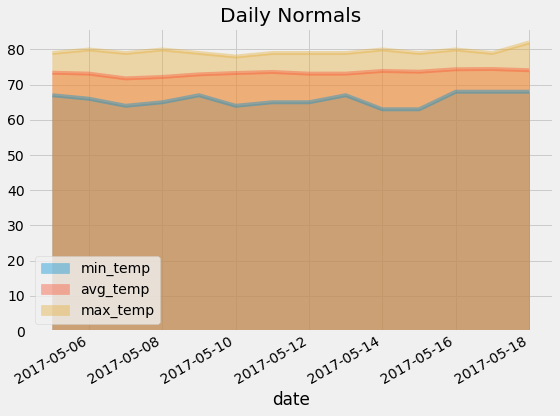

In [51]:
#Use Pandas to plot an area plot (stacked=False) for the daily normals
dn_df.plot(kind='area', stacked=False, figsize=(8,6), alpha=0.4, x_compat=True)
plt.title("Daily Normals")
plt.tight_layout()
plt.savefig("daily_normals.png", dpi=100, bbox_inches='tight')
plt.show()